In [1]:
%load_ext autoreload
%load_ext autotime
%autoreload 2

# Online Outcomes: Predicting Success in Virtual Learning

**<font size="4">Author: Jeffrey Hanif Watson</font>**

## Imports and Project Path

In [2]:
# importing packages
import os, sys
import pandas as pd
import numpy as np
import sqlite3

# setting project path
gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

from dython.nominal import associations

from src import class_Database as d
from src import helper_functions as f
from src import visualizations as v

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette("winter_r")
pd.options.display.max_rows = 300

time: 7.15 s


## Creating The Database

In [3]:
# creating database & database class instance
database_name = 'outcomes.db'
db = d.Database(database_name)

time: 16.8 ms


**Run The Cell Below Once And Then Comment Out**

In [4]:
# file_name = 'anonymisedData.zip'
# db.populate(file_name, database_name)

time: 546 µs


## Creating SQL `conn`, `cur`

In [5]:
data_path = os.path.join(gparent,'data/processed','outcomes.db')
conn = sqlite3.connect(data_path)  
cur = conn.cursor()

time: 2.37 ms


### Database ERD

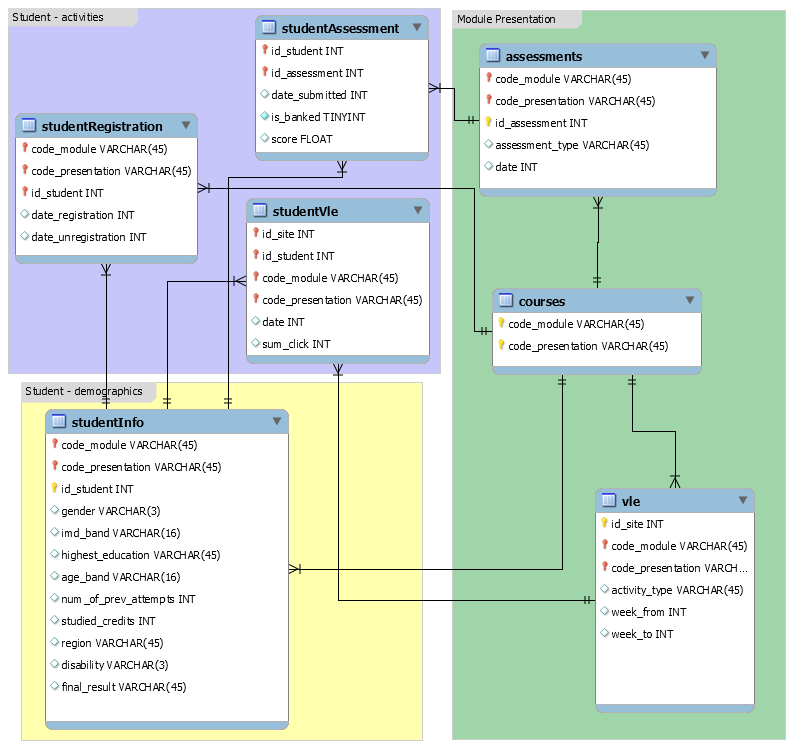

time: 5.27 ms


In [6]:
db.erd

## EDA

### Checking table names

In [7]:
# checking the table names
db.table_names()

['ASSESSMENTS',
 'COURSES',
 'STUDENTASSESSMENT',
 'STUDENTINFO',
 'STUDENTREGISTRATION',
 'STUDENTVLE',
 'VLE']

time: 3.64 ms


## Data Understanding

### Codes & Module Summaries

In [8]:
# month codes used in code_presentation
db.month_codes

{'A': 'January',
 'B': 'Februrary',
 'C': 'March',
 'D': 'April',
 'E': 'May',
 'F': 'June',
 'G': 'July',
 'H': 'August',
 'I': 'Septemeber',
 'J': 'October',
 'K': 'November',
 'L': 'December'}

time: 2.96 ms


In [9]:
# module codes and summaries
db.module_codes

{'AAA': {'Domain': 'Social Sciences', 'Presentations': 2, 'Students': 748},
 'BBB': {'Domain': 'Social Sciences', 'Presentations': '4', 'Students': 7909},
 'CCC': {'Domain': 'STEM', 'Presentations': 2, 'Students': 4434},
 'DDD': {'Domain': 'STEM', 'Presentations': 4, 'Students': 6272},
 'EEE': {'Domain': 'STEM', 'Presentations': 3, 'Students': 2934},
 'FFF': {'Domain': 'STEM', 'Presentations': 4, 'Students': 7762},
 'GGG': {'Domain': 'Social Sciences', 'Presentations': 3, 'Students': 2534}}

time: 3.95 ms


## Student Info Table

In [10]:
# creating student_info data frame
student_info = db.simple_df('STUDENTINFO')

time: 243 ms


In [11]:
# checking first five rows
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


time: 17.2 ms


In [12]:
# checking info
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  object
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  object
 9   studied_credits       32593 non-null  object
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: object(12)
memory usage: 3.0+ MB
time: 36.8 ms


In [13]:
# checking for nulls
student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

time: 30.8 ms


We have 1100 null values in the imd_band column. We'll drop them for now.

In [14]:
# dropping nulls
student_info = student_info.dropna()

time: 53.8 ms


In [15]:
# checking work
student_info.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

time: 28.3 ms


In [16]:
# checking new shape
student_info.shape

(31482, 12)

time: 3.42 ms


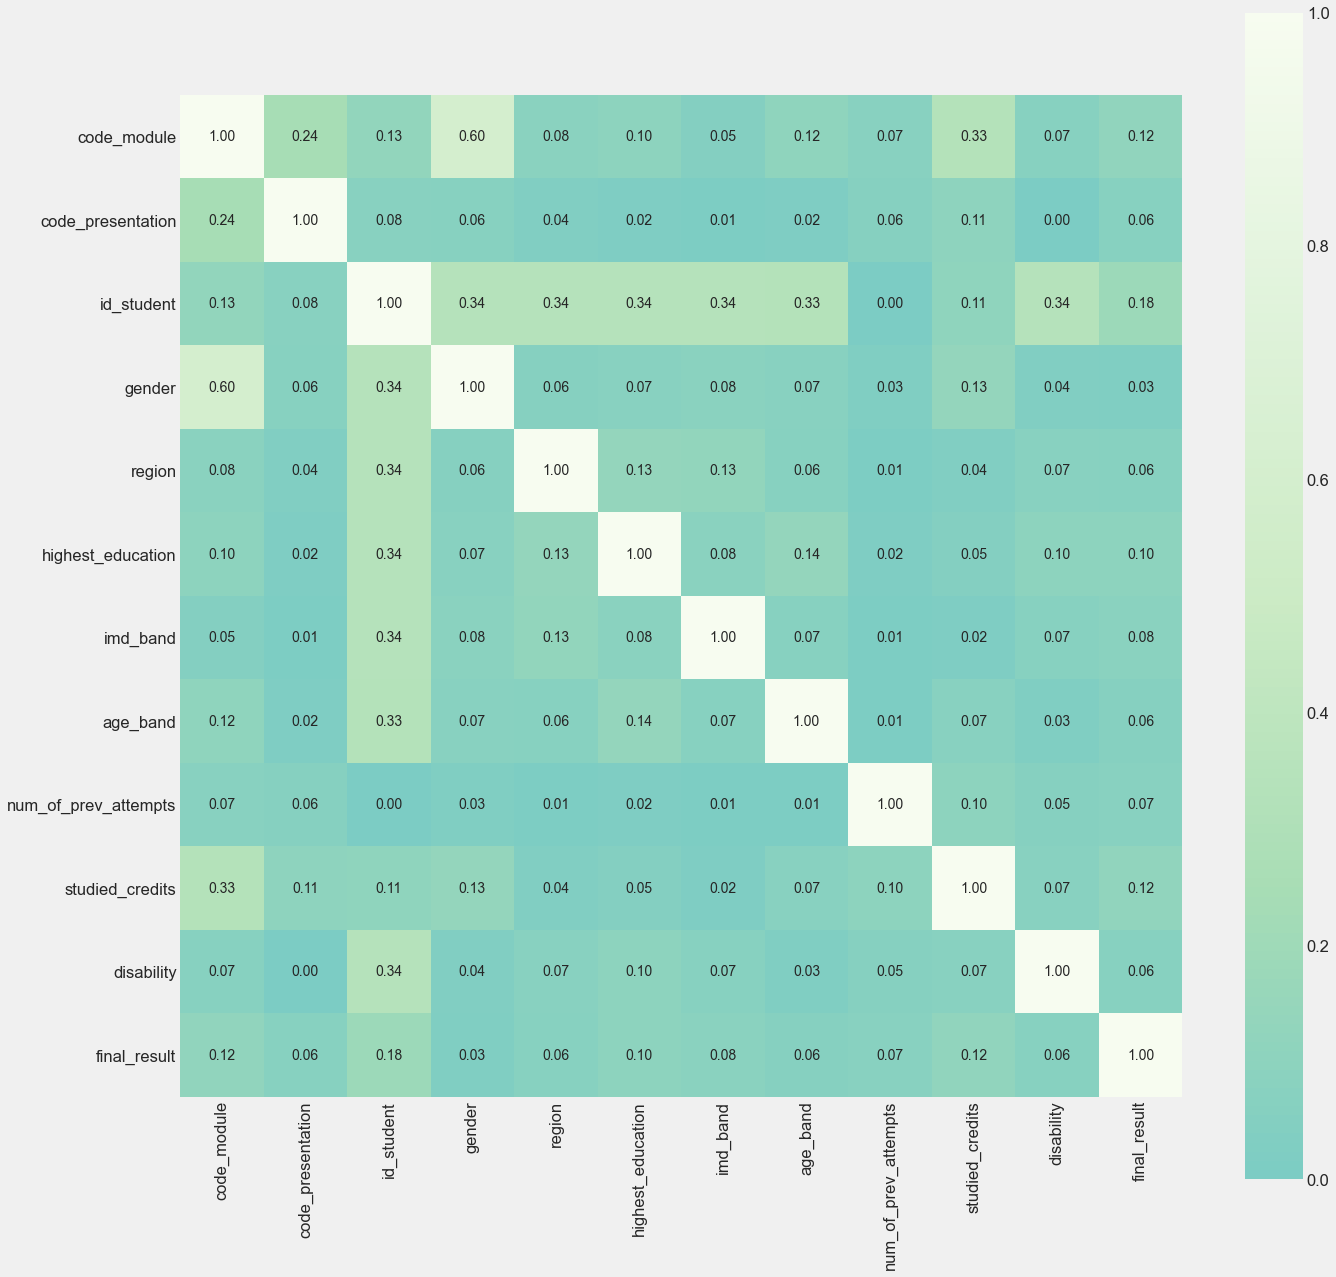

time: 19.7 s


In [17]:
corr1 = associations(student_info, figsize=(20,20), cmap='GnBu_r')

### Share of Outcomes By Type

In [18]:
student_info.final_result.value_counts(normalize=True)

Pass           0.375770
Withdrawn      0.315101
Fail           0.219395
Distinction    0.089734
Name: final_result, dtype: float64

time: 8.53 ms


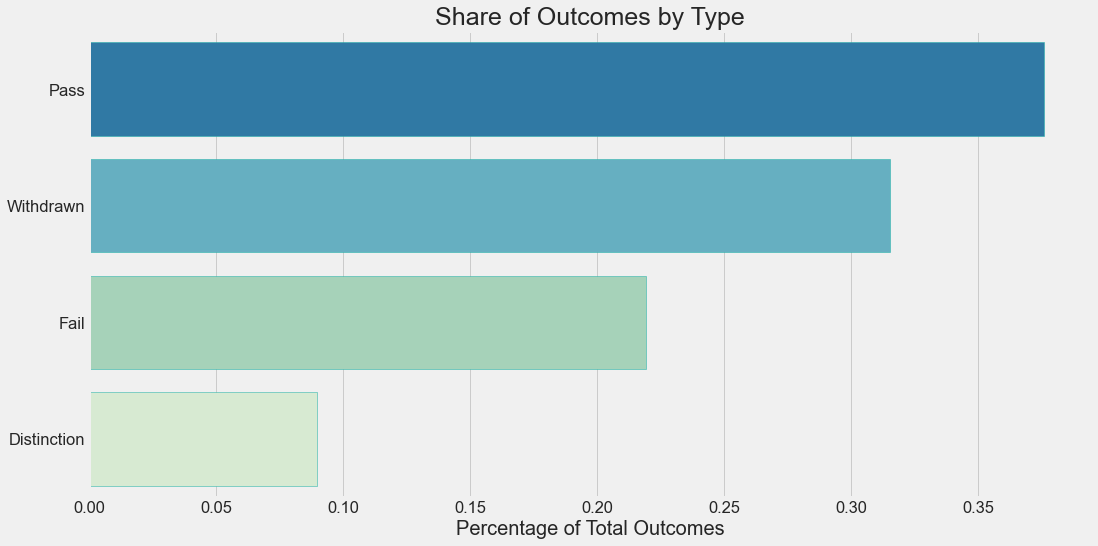

time: 331 ms


In [19]:
v.outcomes_type(student_info, 'outcomes_type')

### Outcomes By IMD Band

In [20]:
student_info['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

time: 6.29 ms


In [21]:
student_info['imd_band'].value_counts(normalize=True)

20-30%     0.116066
30-40%     0.112413
10-20      0.111683
0-10%      0.105171
40-50%     0.103424
50-60%     0.099231
60-70%     0.092275
70-80%     0.091449
80-90%     0.087733
90-100%    0.080554
Name: imd_band, dtype: float64

time: 9.92 ms


In [22]:
# fixing typo
student_info['imd_band'] = student_info['imd_band'].replace(['10-20'], '10-20%')

time: 8.08 ms


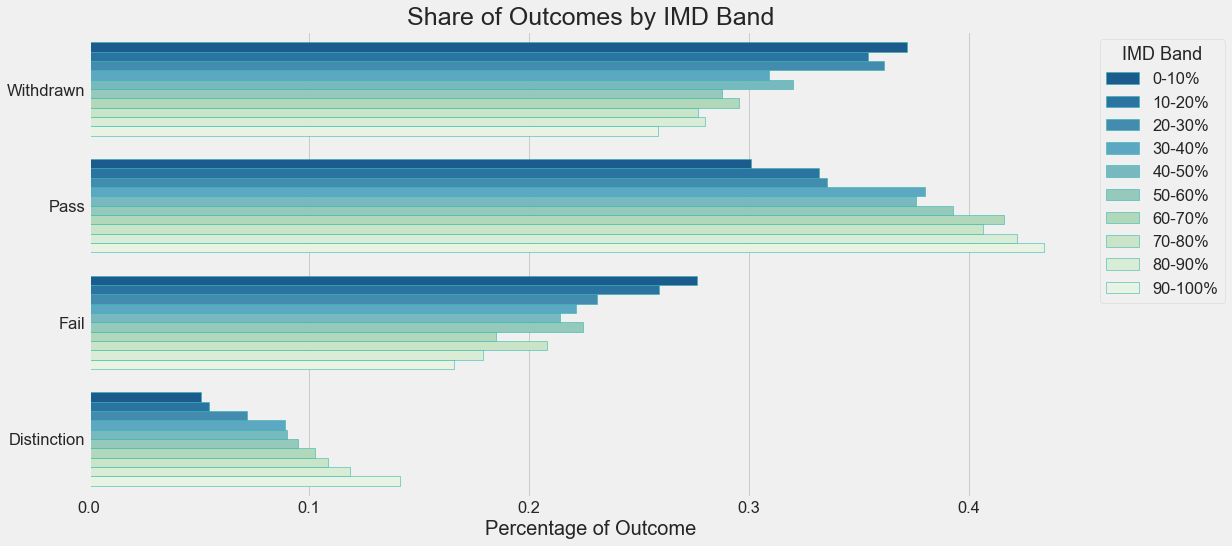

time: 625 ms


In [23]:
v.outcomes_imd(student_info, 'outcomes_imd')

### Outcomes By Disability Status

In [24]:
student_info['disability'].value_counts(normalize=True)

N    0.900546
Y    0.099454
Name: disability, dtype: float64

time: 5.03 ms


In [25]:
# renaming values
student_info['disability'] = student_info['disability'].replace(['Y', 'N'], ['Yes', 'No'])

time: 5.62 ms


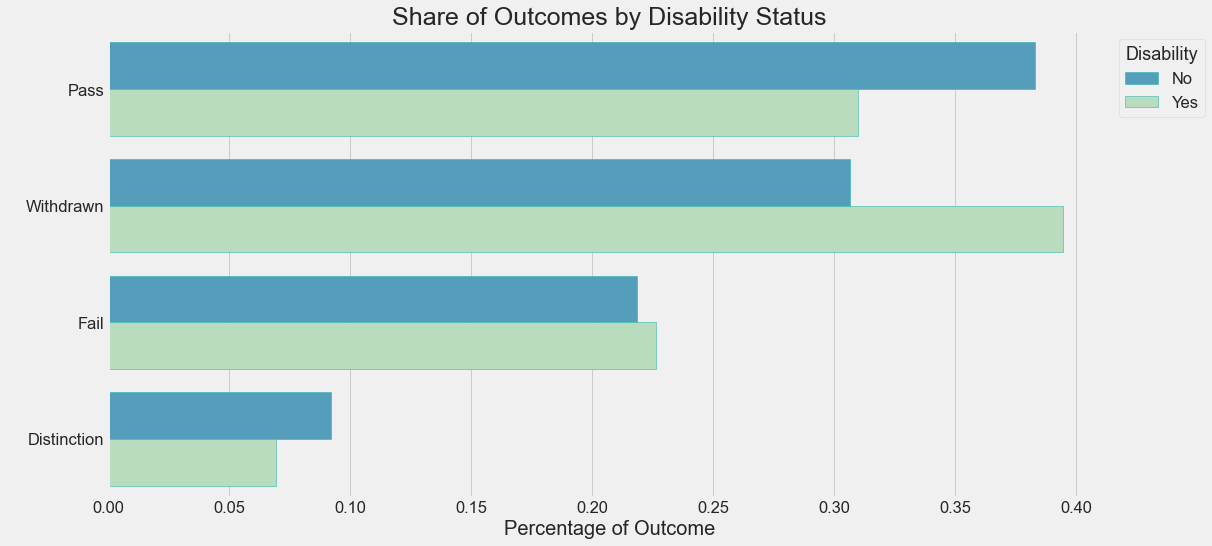

time: 417 ms


In [26]:
v.outcomes_dis(student_info, 'outcomes_dis')

### Outcomes By Age Band

In [27]:
student_info.age_band.value_counts(normalize=True)

0-35     0.707452
35-55    0.286164
55<=     0.006385
Name: age_band, dtype: float64

time: 7.97 ms


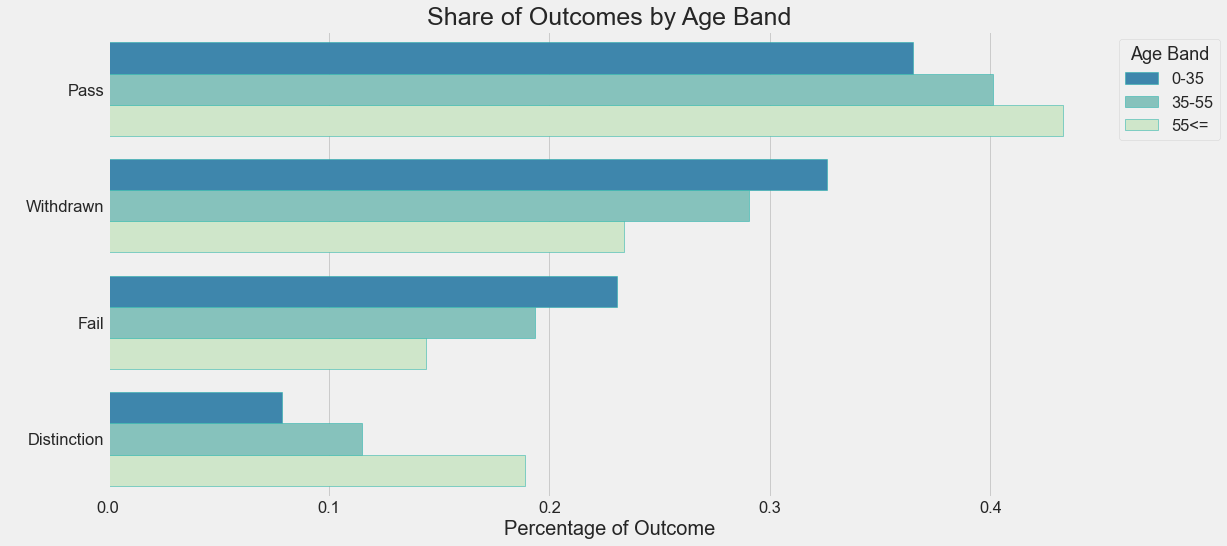

time: 432 ms


In [28]:
v.outcomes_age(student_info, 'outcomes_age')

### Outcomes By Education Level

In [29]:
student_info.highest_education.value_counts(normalize=True)

A Level or Equivalent          0.437139
Lower Than A Level             0.405374
HE Qualification               0.141160
No Formal quals                0.010419
Post Graduate Qualification    0.005908
Name: highest_education, dtype: float64

time: 6.95 ms


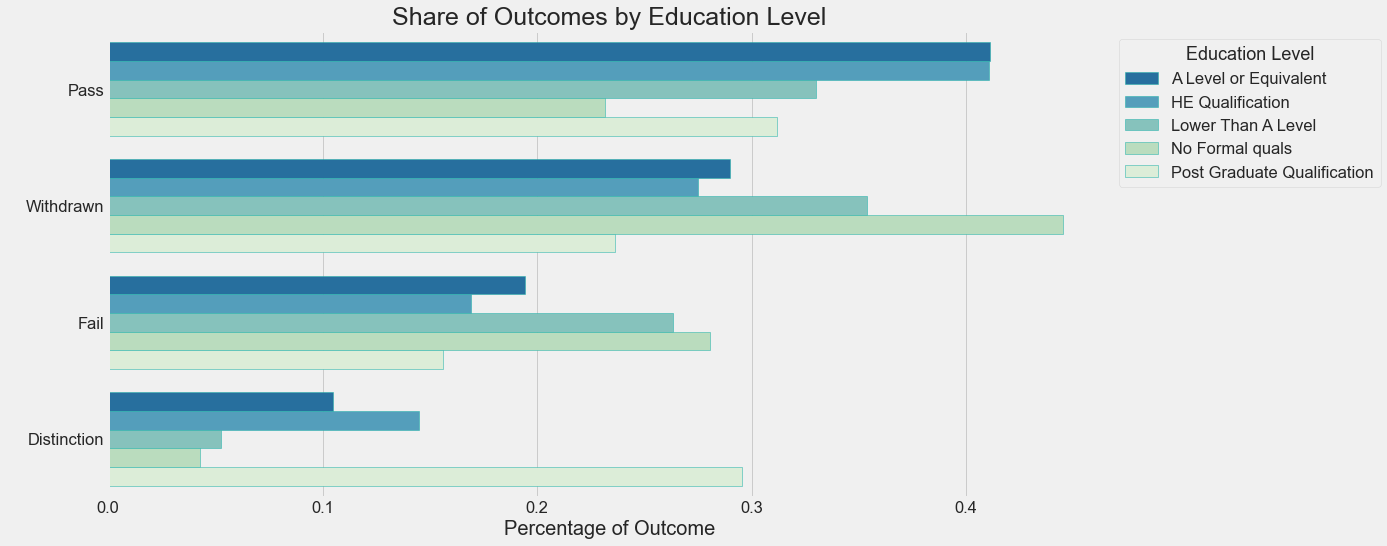

time: 477 ms


In [30]:
v.outcomes_edu(student_info, 'outcomes_edu')

### Outcomes By Gender

In [31]:
student_info.gender.value_counts(normalize=True)

M    0.542119
F    0.457881
Name: gender, dtype: float64

time: 5.65 ms


In [32]:
# renaming values
student_info['gender'] = student_info['gender'].replace(['M', 'F'], ['Male', 'Female'])

time: 5.61 ms


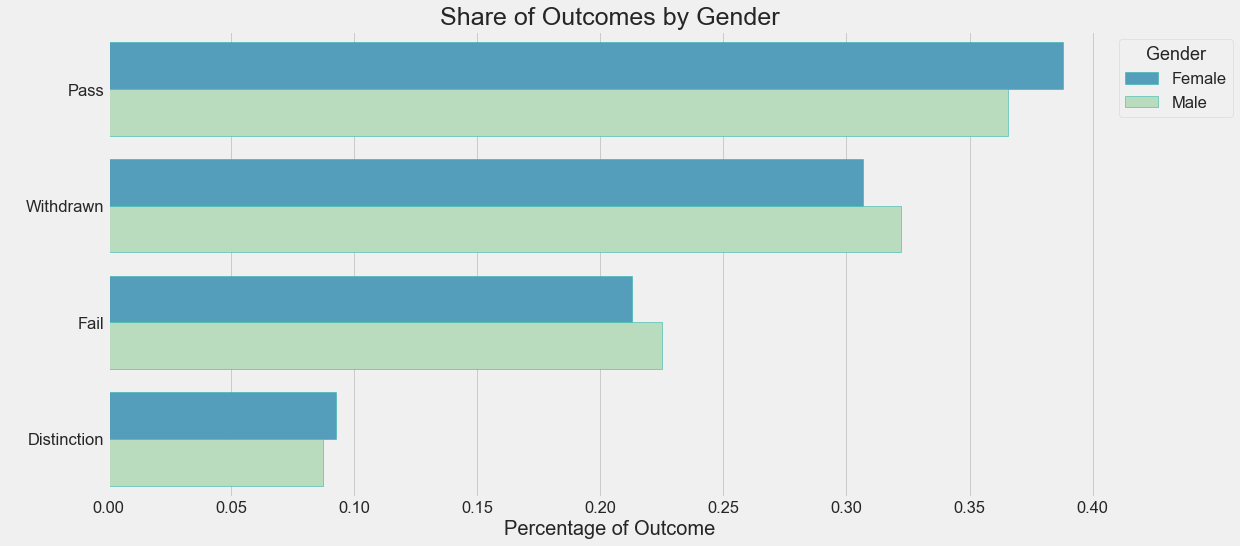

time: 411 ms


In [33]:
v.outcomes_gen(student_info, 'outcomes_gen')

### Outcomes by Region

In [34]:
student_info.region.value_counts(normalize=True)

Scotland                0.109078
East Anglian Region     0.106092
London Region           0.102154
South Region            0.096690
North Western Region    0.092148
West Midlands Region    0.080776
South West Region       0.077219
East Midlands Region    0.075122
South East Region       0.067054
Wales                   0.066260
Yorkshire Region        0.063560
North Region            0.034686
Ireland                 0.029160
Name: region, dtype: float64

time: 8.84 ms


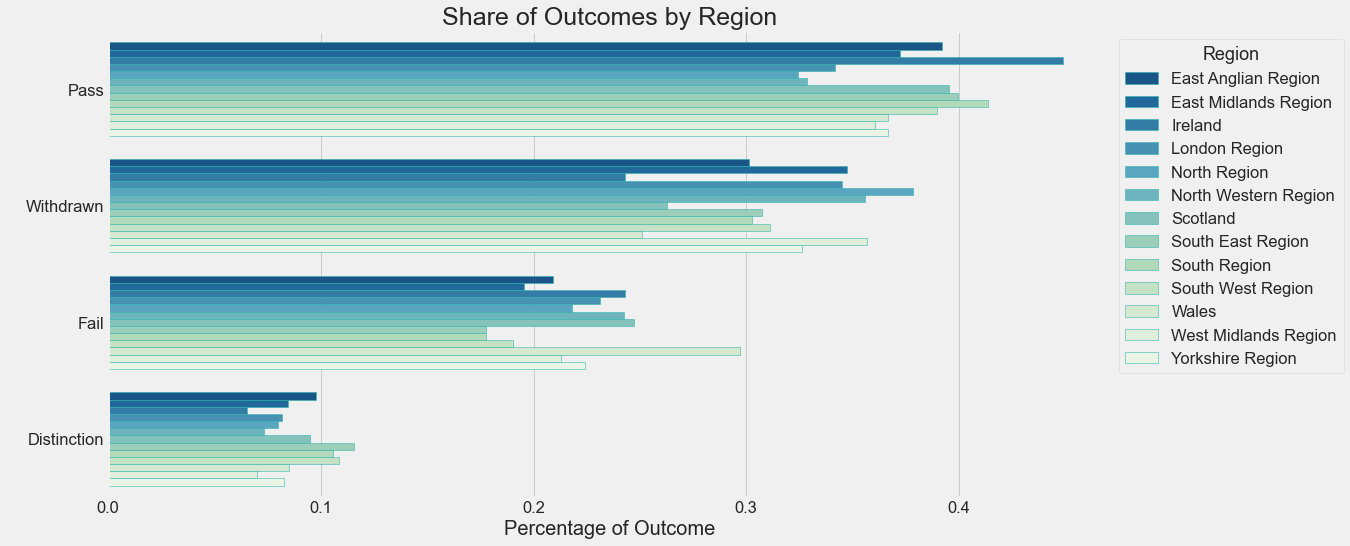

time: 434 ms


In [35]:
v.outcomes_reg(student_info)

### Outcomes by Course Load

In [36]:
# converting data type to numeric
student_info['studied_credits'] = student_info['studied_credits']\
.map(pd.to_numeric)

time: 412 ms


In [37]:
# checking summary stats
student_info['studied_credits'].describe() 

count    31482.000000
mean        79.767804
std         41.049455
min         30.000000
25%         60.000000
50%         60.000000
75%        120.000000
max        655.000000
Name: studied_credits, dtype: float64

time: 6.15 ms


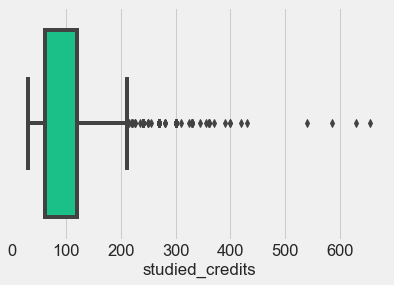

time: 109 ms


In [38]:
sns.boxplot(x=student_info['studied_credits']);

## Dealing With Outliers Using IQR Fences.

In [39]:
student_info['studied_credits'].shape

(31482,)

time: 2.41 ms


In [40]:
Q1 = student_info.studied_credits.quantile(0.25)
Q3 = student_info.studied_credits.quantile(0.75)
IQR = Q3 - Q1
IQR

60.0

time: 6.32 ms


In [41]:
# checking the Stats of the outliers
student_info[((student_info['studied_credits'] < (Q1 - 1.5 * IQR))\
     | (student_info['studied_credits'] >\
        (Q3 + 1.5 * IQR)))]['studied_credits'].describe()

count    338.000000
mean     261.227811
std       51.340068
min      215.000000
25%      240.000000
50%      240.000000
75%      270.000000
max      655.000000
Name: studied_credits, dtype: float64

time: 8.26 ms


In [42]:
student_info = student_info[~((student_info.studied_credits < (Q1 - 1.5 * IQR))\
                              |(student_info.studied_credits > (Q3 + 1.5 * IQR)))].copy()

time: 14.6 ms


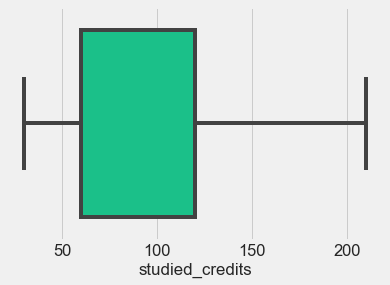

time: 120 ms


In [43]:
# checking boxplot after cleaning
sns.boxplot(x=student_info['studied_credits']);

### Median & Mean Study Credits

In [44]:
# checking mean
student_info.studied_credits.mean()

77.79845235037246

time: 2.16 ms


In [45]:
# checking median
student_info.studied_credits.median()

60.0

time: 3.2 ms


### Binning Data

In [46]:
# binning data
pd.qcut(student_info.studied_credits, q=4, duplicates='drop').unique()

[(29.999, 60.0], (60.0, 120.0], (120.0, 210.0]]
Categories (3, interval[float64]): [(29.999, 60.0] < (60.0, 120.0] < (120.0, 210.0]]

time: 11.1 ms


### Adding `course_load` Category

In [47]:
# adding course_load category
student_info['course_load'] = pd.qcut(student_info.studied_credits, q=4,\
                                      labels=['Light', 'Medium', 'Heavy'],\
                                      duplicates='drop')

time: 5.39 ms


In [48]:
# checking work
print(f'{student_info.course_load.unique()} \n' )
student_info.info()

['Light', 'Medium', 'Heavy']
Categories (3, object): ['Light' < 'Medium' < 'Heavy'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31144 entries, 1 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code_module           31144 non-null  object  
 1   code_presentation     31144 non-null  object  
 2   id_student            31144 non-null  object  
 3   gender                31144 non-null  object  
 4   region                31144 non-null  object  
 5   highest_education     31144 non-null  object  
 6   imd_band              31144 non-null  object  
 7   age_band              31144 non-null  object  
 8   num_of_prev_attempts  31144 non-null  object  
 9   studied_credits       31144 non-null  int64   
 10  disability            31144 non-null  object  
 11  final_result          31144 non-null  object  
 12  course_load           31144 non-null  category
dtypes: category(1), int6

In [49]:
# checking value_counts
student_info.course_load.value_counts(normalize=True)

Light     0.637940
Medium    0.302787
Heavy     0.059273
Name: course_load, dtype: float64

time: 5.33 ms


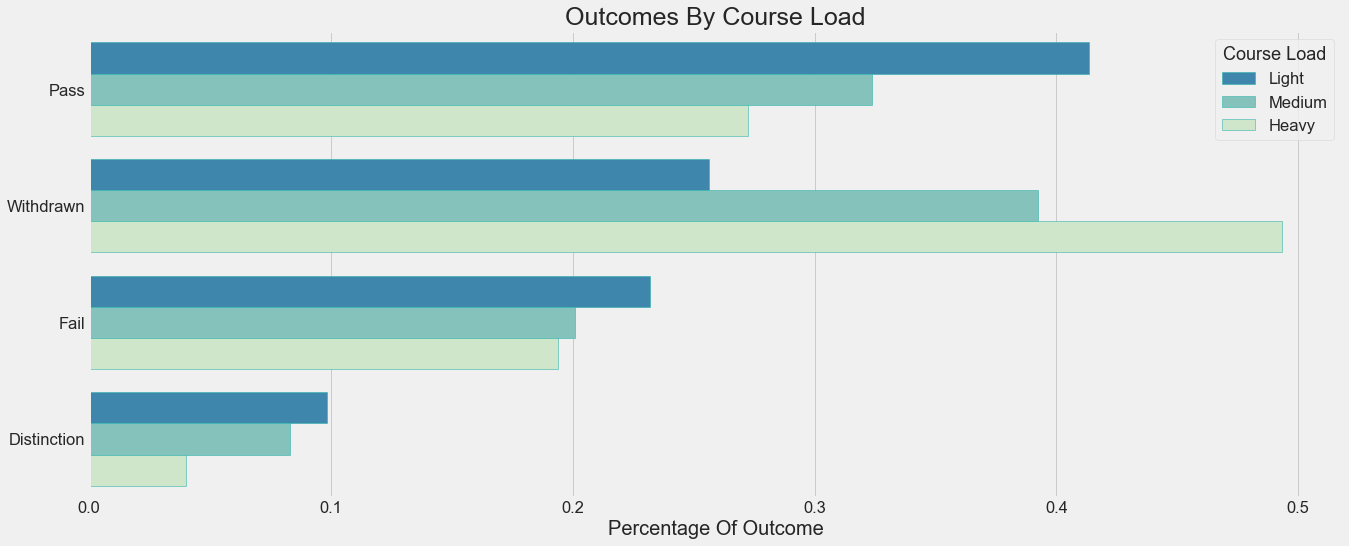

time: 448 ms


In [50]:
v.outcome_cl(student_info, 'outcomes_cl')

### Binarizing the Target

In [51]:
student_info.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,course_load
1,AAA,2013J,28400,Female,Scotland,HE Qualification,20-30%,35-55,0,60,No,Pass,Light
2,AAA,2013J,30268,Female,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Yes,Withdrawn,Light


time: 9 ms


In [52]:
student_info['studied_credits'].shape

(31144,)

time: 2.01 ms


## Joining STUDENTINFO & STUDENTVLE Tables (SQL)

In [53]:
# getting column names and table info
q= "PRAGMA table_info(STUDENTVLE);"
f.fetch(cur, q)

[(0, 'code_module', 'TEXT', 0, None, 0),
 (1, 'code_presentation', 'TEXT', 0, None, 0),
 (2, 'id_student', 'TEXT', 0, None, 0),
 (3, 'id_site', 'TEXT', 0, None, 0),
 (4, 'date', 'TEXT', 0, None, 0),
 (5, 'sum_click', 'TEXT', 0, None, 0)]

time: 3.23 ms


In [54]:
q = """
SELECT SV.*, 
SUM(SV.sum_click) AS click_sum,
COUNT(SV.sum_click) AS num_activities,
SI.*
FROM 
STUDENTVLE as SV
JOIN 
STUDENTINFO as SI
ON SV.code_module = SI.code_module
AND SV.code_presentation = SI.code_presentation
AND SV.id_student = SI.id_student
GROUP BY 
SV.code_module,
SV.code_presentation,
SV.id_student;
"""
sv_si = pd.read_sql(q, conn)

time: 38.1 s


In [55]:
# cleaning up the data frame
sv_si = f.sv_si_fixes(sv_si)

time: 6.44 s


In [56]:
sv_si.head(2)

,target,final_result,code_module,code_presentation,id_student,id_site,date,click_sum,num_activities,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,course_load
0,1,Pass,AAA,2013J,100893,547013,-9,744,243,Male,Yorkshire Region,A Level or Equivalent,20-30%,0-35,0,60,No,Light
1,1,Pass,AAA,2013J,101781,546614,-10,4104,913,Male,South Region,Lower Than A Level,80-90%,35-55,0,60,No,Light


time: 12.2 ms


In [57]:
# checking work
for col in sv_si.columns:
    print(f'{col}: \n {sv_si[col].unique()}')

target: 
 [1 0]
final_result: 
 ['Pass' 'Withdrawn' 'Distinction' 'Fail']
code_module: 
 ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation: 
 ['2013J' '2014J' '2013B' '2014B']
id_student: 
 ['100893' '101781' '102806' ... '699461' '699628' '92103']
id_site: 
 ['547013' '546614' '546719' ... '897145' '897063' '897067']
date: 
 [ -9 -10  -3  12  -5   0   2   3  21  -7  -8  -6  -1  16   1  -2  -4  49
   9  10 -24 -16 -23 -20 -21 -11 -15 -19   7 -17   5  13 -13 -14 -18 -22
  11  23 -12  14  37  18  17   4  15  46  38  19  30  24   6   8  68  33
  40  88  26  22  29  32  25 211  28  27 224  35  55  47 138  31  44  96
 123 122  36 132  51  54 135 120  91  94  59  45 178  20 234 117  63  34
 238  43  39 108  53 189  61 114  56 146  64  87  52 109  48 170 101  69
  60  62 127 102 -25  86 106 144 107 111  42 164  99  89 110 100 119 128
  65 213  57  67  58 145  82 133  74 173 126  81  90  41 136  80  97  85
  79  72  78  66 190 153  50  75]
click_sum: 
 [ 744 4104 1944 ... 3773 1817

In [58]:
# checking types
sv_si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28174 entries, 0 to 29227
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                28174 non-null  int64   
 1   final_result          28174 non-null  object  
 2   code_module           28174 non-null  object  
 3   code_presentation     28174 non-null  object  
 4   id_student            28174 non-null  object  
 5   id_site               28174 non-null  object  
 6   date                  28174 non-null  int64   
 7   click_sum             28174 non-null  int64   
 8   num_activities        28174 non-null  int64   
 9   gender                28174 non-null  object  
 10  region                28174 non-null  object  
 11  highest_education     28174 non-null  object  
 12  imd_band              28174 non-null  object  
 13  age_band              28174 non-null  object  
 14  num_of_prev_attempts  28174 non-null  int64   
 15  st

In [59]:
# checking nulls
sv_si.isna().sum()

target                  0
final_result            0
code_module             0
code_presentation       0
id_student              0
id_site                 0
date                    0
click_sum               0
num_activities          0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
course_load             0
dtype: int64

time: 23.8 ms


In [60]:
# associations(sv_si, figsize=(20,20), cmap='GnBu_r')

time: 612 µs


In [61]:
# creating row_id
sv_si['row_id'] = sv_si.code_module + sv_si.code_presentation + sv_si.id_student

time: 12 ms


In [62]:
# moving to front of df
f.col_pop(sv_si, 'row_id')

time: 2.45 ms


In [63]:
# checking work
sv_si.head()

,row_id,target,final_result,code_module,code_presentation,id_student,id_site,date,click_sum,num_activities,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,course_load
0,AAA2013J100893,1,Pass,AAA,2013J,100893,547013,-9,744,243,Male,Yorkshire Region,A Level or Equivalent,20-30%,0-35,0,60,No,Light
1,AAA2013J101781,1,Pass,AAA,2013J,101781,546614,-10,4104,913,Male,South Region,Lower Than A Level,80-90%,35-55,0,60,No,Light
2,AAA2013J102806,1,Pass,AAA,2013J,102806,546719,-10,1944,781,Male,North Western Region,A Level or Equivalent,30-40%,0-35,0,60,No,Light
3,AAA2013J102952,1,Pass,AAA,2013J,102952,546879,-3,1150,313,Male,London Region,HE Qualification,60-70%,0-35,0,60,No,Light
4,AAA2013J1035023,1,Pass,AAA,2013J,1035023,546652,-10,1896,572,Female,London Region,Lower Than A Level,30-40%,35-55,0,60,No,Light


time: 14.5 ms


In [64]:
# checking summary stats
sv_si.click_sum.describe()

count    28174.000000
mean      1326.499219
std       1713.634452
min          1.000000
25%        252.000000
50%        717.000000
75%       1722.000000
max      24139.000000
Name: click_sum, dtype: float64

time: 9.15 ms


In [65]:
# checking shape
sv_si.shape

(28174, 19)

time: 3.8 ms


In [66]:
# removing outliers
sv_si = sv_si[~((sv_si.studied_credits < (Q1 - 1.5 * IQR))\
                |(sv_si.studied_credits > (Q3 + 1.5 * IQR)))].copy()

time: 37.8 ms


In [67]:
# checking shape after cleaning
sv_si.shape

(27924, 19)

time: 2.54 ms


### Median & Mean Study Credits

In [68]:
# checking mean
sv_si.studied_credits.mean()

76.37963758773815

time: 3.58 ms


In [69]:
# checking median
sv_si.studied_credits.median()

60.0

time: 5 ms


In [70]:
# binning data
pd.qcut(sv_si.studied_credits, q=4,duplicates='drop').unique()                                    

[(29.999, 60.0], (90.0, 210.0], (60.0, 90.0]]
Categories (3, interval[float64]): [(29.999, 60.0] < (60.0, 90.0] < (90.0, 210.0]]

time: 13.4 ms


### Adding `course_load` Category

In [71]:
# adding course_load category
sv_si['course_load'] = pd.qcut(sv_si.studied_credits, q=4,\
                                      labels=['Light', 'Medium', 'Heavy'],\
                                      duplicates='drop')

time: 6.37 ms


In [72]:
# checking work
print(f'{sv_si.course_load.unique()} \n' )
student_info.info()

['Light', 'Heavy', 'Medium']
Categories (3, object): ['Light' < 'Medium' < 'Heavy'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31144 entries, 1 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code_module           31144 non-null  object  
 1   code_presentation     31144 non-null  object  
 2   id_student            31144 non-null  object  
 3   gender                31144 non-null  object  
 4   region                31144 non-null  object  
 5   highest_education     31144 non-null  object  
 6   imd_band              31144 non-null  object  
 7   age_band              31144 non-null  object  
 8   num_of_prev_attempts  31144 non-null  object  
 9   studied_credits       31144 non-null  int64   
 10  disability            31144 non-null  object  
 11  final_result          31144 non-null  object  
 12  course_load           31144 non-null  category
dtypes: category(1), int6

In [73]:
# checking value_counts
sv_si.course_load.value_counts(normalize=True)

Light     0.653237
Heavy     0.242050
Medium    0.104713
Name: course_load, dtype: float64

time: 6.86 ms


In [74]:
student_info.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,course_load
1,AAA,2013J,28400,Female,Scotland,HE Qualification,20-30%,35-55,0,60,No,Pass,Light
2,AAA,2013J,30268,Female,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Yes,Withdrawn,Light


time: 13.4 ms


### Mean Clicks Per Outcome

In [75]:
mean_clicks = sv_si.groupby('final_result')['click_sum'].mean()\
.reset_index(name='mean_clicks').round()

time: 11.3 ms


In [76]:
mean_clicks.describe()

,mean_clicks
count,4.000000
mean,1414.000000
std,1038.940165
min,440.000000
25%,618.500000
50%,1284.500000
75%,2080.000000
max,2647.000000


time: 13.1 ms


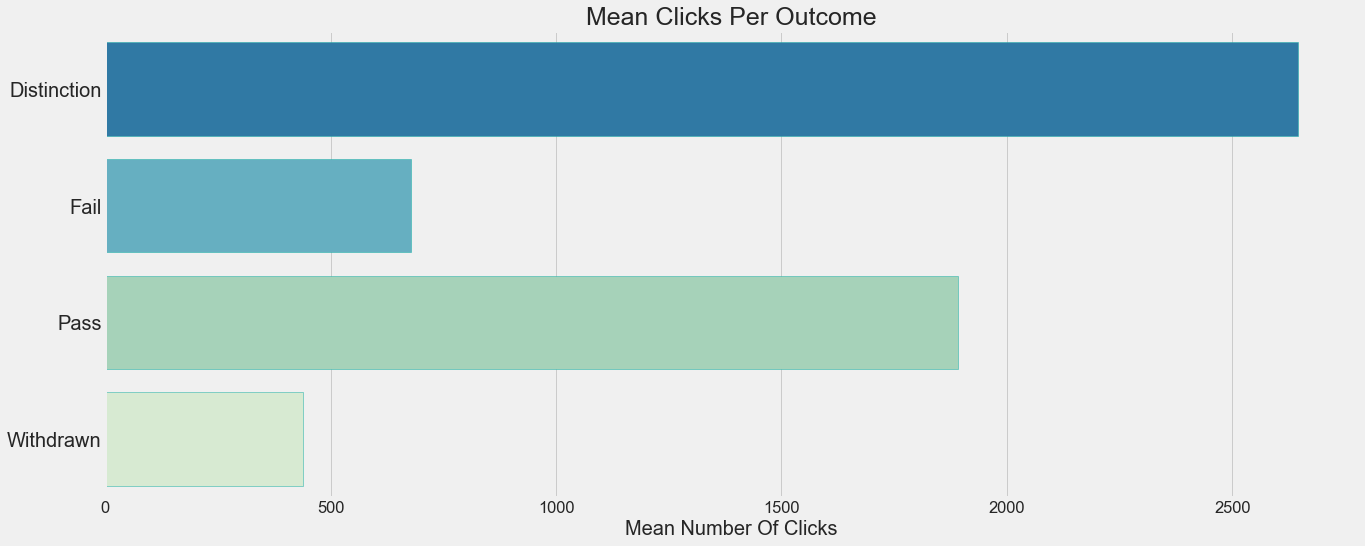

time: 221 ms


In [77]:
v.outcome_clks(sv_si)

### Mean Activities per Outcome

In [78]:
mean_activities = sv_si.groupby('final_result')['num_activities'].mean()\
.reset_index(name='mean_activities').round()

time: 11.7 ms


In [79]:
mean_activities.describe()

,mean_activities
count,4.000000
mean,375.750000
std,257.042636
min,132.000000
25%,177.750000
50%,348.500000
75%,546.500000
max,674.000000


time: 13.1 ms


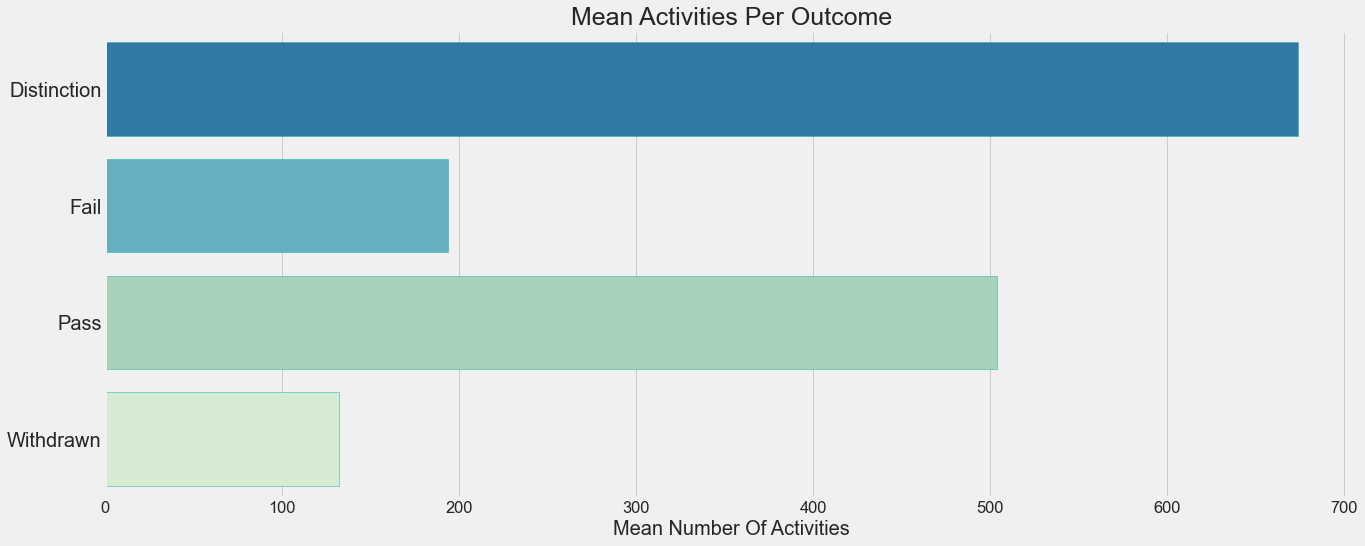

time: 237 ms


In [80]:
v.outcome_nact(sv_si)

## STUDENTVLE Table

In [81]:
# creating simple data frame
svle = db.simple_df('STUDENTVLE')
svle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


time: 28.4 s


In [82]:
# converting datatype to numeric
conversions = ['date', 'sum_click']
svle[conversions] = svle[conversions].apply(pd.to_numeric)

time: 11.1 s


In [83]:
# creating row_id
svle['row_id'] = svle.code_module + svle.code_presentation + svle.id_student

time: 1.77 s


In [84]:
# dropping extraneous columns
svle = svle.drop(columns=['code_module', 'code_presentation', 'id_student'])

time: 2.8 s


In [85]:
# moving row_id to front of data frame
f.col_pop(svle, 'row_id')

time: 311 ms


In [86]:
# getting min date
svle.date.min()

-25

time: 16.6 ms


In [87]:
# translating date 25 to the right
svle['date'] = svle['date'] + 25

time: 51.5 ms


## Getting Trace Data

In [88]:
# pivoting data frame and summing sum_clicks by day
sv_pivot = svle.pivot_table(
    index='date', columns=['row_id'],
    values='sum_click', aggfunc=[np.sum], fill_value=0)

time: 8.73 s


In [89]:
# setting row_ids as column_names and resetting index
sv_pivot.columns = sv_pivot.columns.to_flat_index()
sv_pivot.columns = [sv_pivot.columns[i][1] for i in range(len(sv_pivot.columns))] 
sv_pivot = sv_pivot.reset_index(drop=True)

time: 63.9 ms


In [90]:
# transposing data frame
sv_unpivot = sv_pivot.T

time: 3.59 ms


In [91]:
# resetting index, renaming column and saving to sv_time
sv_unpivot = sv_unpivot.reset_index()
sv_time = sv_unpivot.rename(columns = {'index': 'row_id'})

time: 65.2 ms


In [92]:
# checking work
sv_time.head()

,row_id,0,1,2,3,4,5,6,7,8,...,285,286,287,288,289,290,291,292,293,294
0,AAA2013J100893,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AAA2013J101781,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0
2,AAA2013J102806,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
3,AAA2013J102952,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AAA2013J1035023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 11.5 ms


## Merging SI & SV_time data

In [93]:
svsi_time = sv_si.merge(sv_time, on='row_id')

time: 127 ms


In [94]:
# checking work
svsi_time.head()

,row_id,target,final_result,code_module,code_presentation,id_student,id_site,date,click_sum,num_activities,...,285,286,287,288,289,290,291,292,293,294
0,AAA2013J100893,1,Pass,AAA,2013J,100893,547013,-9,744,243,...,0,0,0,0,0,0,0,0,0,0
1,AAA2013J101781,1,Pass,AAA,2013J,101781,546614,-10,4104,913,...,0,0,0,0,0,0,0,0,10,0
2,AAA2013J102806,1,Pass,AAA,2013J,102806,546719,-10,1944,781,...,0,0,0,0,0,0,0,2,0,0
3,AAA2013J102952,1,Pass,AAA,2013J,102952,546879,-3,1150,313,...,0,0,0,0,0,0,0,0,0,0
4,AAA2013J1035023,1,Pass,AAA,2013J,1035023,546652,-10,1896,572,...,0,0,0,0,0,0,0,0,0,0


time: 15.8 ms


In [95]:
# checking info
svsi_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27924 entries, 0 to 27923
Columns: 314 entries, row_id to 294
dtypes: category(1), int64(301), object(12)
memory usage: 66.9+ MB
time: 22.7 ms


In [96]:
# checking for nulls
svsi_time.isna().sum().value_counts()

0    314
dtype: int64

time: 49.4 ms


## VLE Table

In [97]:
vle = db.simple_df('VLE')
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,None,None
1,546712,AAA,2013J,oucontent,None,None
2,546998,AAA,2013J,resource,None,None
3,546888,AAA,2013J,url,None,None
4,547035,AAA,2013J,resource,None,None


time: 29.3 ms


## COURSES Table

In [98]:
courses = db.simple_df('COURSES')
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


time: 7.26 ms


## ASSESSMENTS Table

In [99]:
assess_df = db.simple_df('ASSESSMENTS')
assess_df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10
1,AAA,2013J,1753,TMA,54,20
2,AAA,2013J,1754,TMA,117,20
3,AAA,2013J,1755,TMA,166,20
4,AAA,2013J,1756,TMA,215,30


time: 11.3 ms


In [100]:
# converting datatype
assess_df['weight'] = assess_df['weight'].map(pd.to_numeric)

time: 4.95 ms


In [101]:
# making weights decimals
assess_df['weight'] = assess_df['weight']*.01

time: 1.34 ms


In [102]:
# checking uniques
assess_df['weight'].unique()

array([0.1  , 0.2  , 0.3  , 1.   , 0.01 , 0.05 , 0.18 , 0.   , 0.35 ,
       0.02 , 0.07 , 0.08 , 0.09 , 0.22 , 0.03 , 0.04 , 0.06 , 0.075,
       0.125, 0.15 , 0.175, 0.25 , 0.16 , 0.28 ])

time: 2.89 ms


## STUDENTASSESSMENT Table

In [103]:
stuassess = db.simple_df('STUDENTASSESSMENT')
stuassess.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


time: 389 ms


In [104]:
# checking nulls
stuassess.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

time: 49.5 ms


In [105]:
# converting datatype
stuassess['score'] = stuassess['score'].apply(pd.to_numeric)

time: 2.23 s


In [106]:
# checking summary statistics
stuassess['score'].describe()

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

time: 15.5 ms


## Mean Score Feature

In [107]:
# grouping by id_student
scores = stuassess.groupby(['id_student'])['score'].mean().reset_index(name='mean_score')

time: 64.7 ms


In [108]:
# mean_scores dataframe
mean_scores = pd.DataFrame(scores)

time: 959 µs


In [109]:
# merging mean_scores to stuassess
stuassess = stuassess.merge(mean_scores, on='id_student')

time: 68.3 ms


In [110]:
# checking work
stuassess.head()

,id_assessment,id_student,date_submitted,is_banked,score,mean_score
0,1752,11391,18,0,78.0,82.0
1,1753,11391,53,0,85.0,82.0
2,1754,11391,115,0,80.0,82.0
3,1755,11391,164,0,85.0,82.0
4,1756,11391,212,0,82.0,82.0


time: 10.8 ms


## Median Score Feature

In [111]:
# grouping by id_student
scores = stuassess.groupby(['id_student'])['score'].median().reset_index(name='median_score')

time: 63.3 ms


In [112]:
# median_scores df
median_scores = pd.DataFrame(scores)

time: 796 µs


In [113]:
# merging median-scores to stuassess
stuassess = stuassess.merge(median_scores, on='id_student')

time: 62.3 ms


In [114]:
# checking work
stuassess.head()

,id_assessment,id_student,date_submitted,is_banked,score,mean_score,median_score
0,1752,11391,18,0,78.0,82.0,82.0
1,1753,11391,53,0,85.0,82.0,82.0
2,1754,11391,115,0,80.0,82.0,82.0
3,1755,11391,164,0,85.0,82.0,82.0
4,1756,11391,212,0,82.0,82.0,82.0


time: 14.2 ms


## Weighted Average Feature

In [115]:
# merging dfs
stuassess = stuassess.merge(assess_df, on='id_assessment')

time: 69.3 ms


In [116]:
# row_id
stuassess['row_id'] = stuassess.code_module\
+ stuassess.code_presentation + stuassess.id_student

# moving to from of df
col_name = 'row_id'
col = stuassess.pop(col_name)
stuassess.insert(0, col_name, col)

time: 46.7 ms


In [117]:
# adjusted scores
stuassess['adj_score'] = stuassess['score']*stuassess['weight']

time: 4.06 ms


In [118]:
# checking first five rows
stuassess.head()

,row_id,id_assessment,id_student,date_submitted,is_banked,score,mean_score,median_score,code_module,code_presentation,assessment_type,date,weight,adj_score
0,AAA2013J11391,1752,11391,18,0,78.0,82.0,82.0,AAA,2013J,TMA,19,0.1,7.8
1,AAA2013J28400,1752,28400,22,0,70.0,66.4,68.0,AAA,2013J,TMA,19,0.1,7.0
2,AAA2013J31604,1752,31604,17,0,72.0,76.0,74.0,AAA,2013J,TMA,19,0.1,7.2
3,AAA2013J32885,1752,32885,26,0,69.0,54.4,63.0,AAA,2013J,TMA,19,0.1,6.9
4,AAA2013J38053,1752,38053,19,0,79.0,68.0,69.0,AAA,2013J,TMA,19,0.1,7.9


time: 19.6 ms


In [119]:
# weighted_ave df
weighted_ave = stuassess.groupby('row_id')['adj_score']\
.sum().reset_index().rename(columns={'adj_score': 'weighted_ave'})

time: 53.8 ms


In [120]:
# merging dfs
stuassess = stuassess.merge(weighted_ave, on='row_id')

time: 112 ms


In [121]:
# checking first five rowa
stuassess.head()

,row_id,id_assessment,id_student,date_submitted,is_banked,score,mean_score,median_score,code_module,code_presentation,assessment_type,date,weight,adj_score,weighted_ave
0,AAA2013J11391,1752,11391,18,0,78.0,82.0,82.0,AAA,2013J,TMA,19,0.1,7.8,82.4
1,AAA2013J11391,1753,11391,53,0,85.0,82.0,82.0,AAA,2013J,TMA,54,0.2,17.0,82.4
2,AAA2013J11391,1754,11391,115,0,80.0,82.0,82.0,AAA,2013J,TMA,117,0.2,16.0,82.4
3,AAA2013J11391,1755,11391,164,0,85.0,82.0,82.0,AAA,2013J,TMA,166,0.2,17.0,82.4
4,AAA2013J11391,1756,11391,212,0,82.0,82.0,82.0,AAA,2013J,TMA,215,0.3,24.6,82.4


time: 23 ms


In [122]:
# merging dfs
stuassess = stuassess.merge(svsi_time, on='row_id')

time: 1.71 s


## Mean Weighted Average

In [123]:
# mean weighted average
mean_wa = stuassess.groupby('final_result')['weighted_ave'].mean()\
.reset_index(name='mean_wa').round()

time: 26.1 ms


In [124]:
# checking values
mean_wa

,final_result,mean_wa
0,Distinction,97.0
1,Fail,46.0
2,Pass,80.0
3,Withdrawn,25.0


time: 6.43 ms


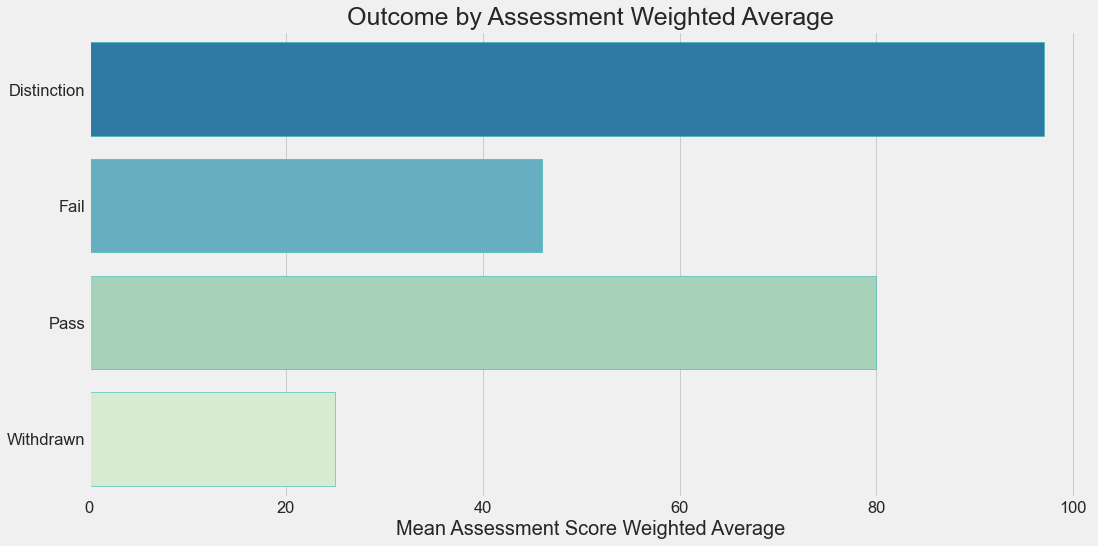

time: 412 ms


In [125]:
v.outcomes_wa(stuassess, 'outcomes_wa')

## Average Median Assessment Score

In [126]:
mms = stuassess.groupby('final_result')['median_score'].mean()\
.reset_index(name='mean_ms').round()
mms

,final_result,mean_ms
0,Distinction,89.0
1,Fail,66.0
2,Pass,77.0
3,Withdrawn,68.0


time: 26.8 ms


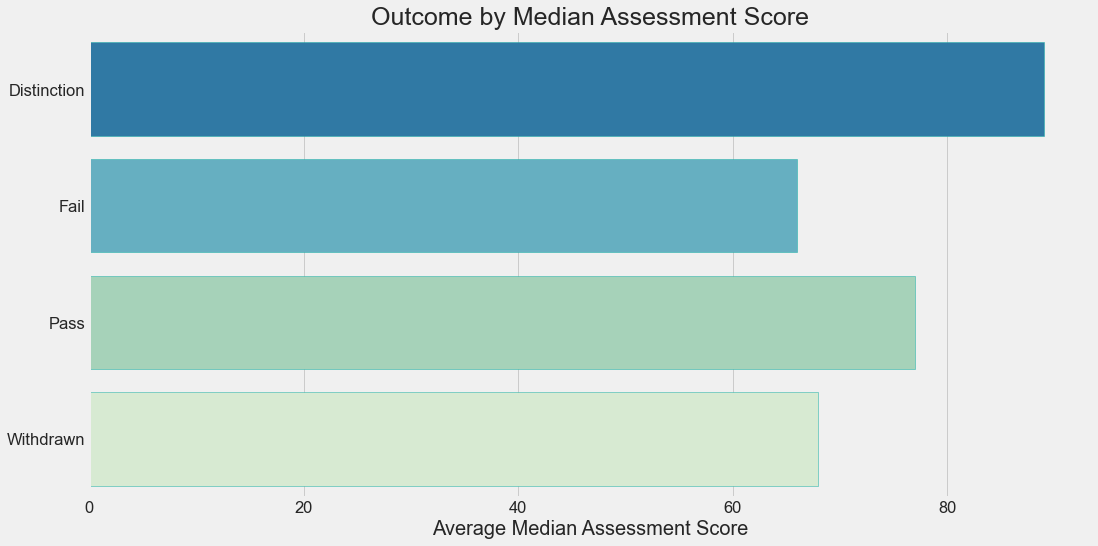

time: 458 ms


In [127]:
v.outcomes_med(stuassess, 'outcomes_med')

## Average Mean Assessment Score 

In [128]:
# mean weighted average
mean_scores = stuassess.groupby('final_result')['mean_score'].mean()\
.reset_index(name='mean_score').round()

time: 21.9 ms


In [129]:
# checking values
mean_scores

,final_result,mean_score
0,Distinction,88.0
1,Fail,65.0
2,Pass,77.0
3,Withdrawn,67.0


time: 6.73 ms


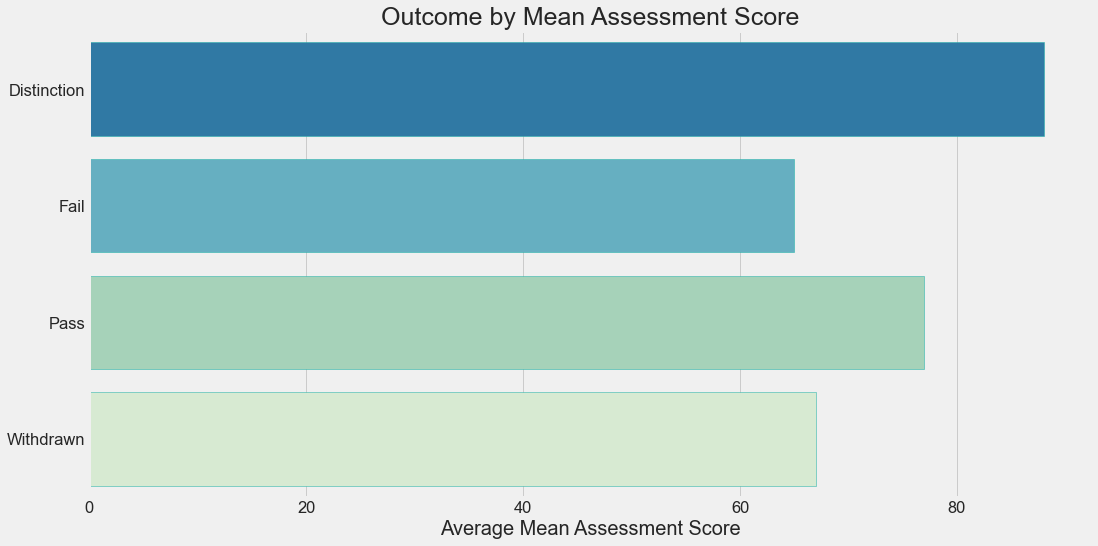

time: 250 ms


In [130]:
v.outcomes_mean(stuassess)

## STUDENTREGISTRATION Table

In [131]:
stureg = db.simple_df('STUDENTREGISTRATION')
stureg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,None
1,AAA,2013J,28400,-53,None
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,None
4,AAA,2013J,32885,-176,None


time: 91.1 ms


In [132]:
# creating row_id
stureg['row_id'] = stureg.code_module + stureg.code_presentation + stureg.id_student

time: 12 ms


In [133]:
# moving to front of df
f.col_pop(stureg, 'row_id')

time: 4.76 ms


In [134]:
# checking work
stureg.head()

,row_id,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA2013J11391,AAA,2013J,11391,-159,None
1,AAA2013J28400,AAA,2013J,28400,-53,None
2,AAA2013J30268,AAA,2013J,30268,-92,12
3,AAA2013J31604,AAA,2013J,31604,-52,None
4,AAA2013J32885,AAA,2013J,32885,-176,None


time: 9.19 ms


## SQL Query To Create Data Frame

In [135]:
q="""
SELECT
/*selecting all from multiple tables*/
SI.*,
SA.*,
A.*,
SV.*,
C.*,
/* creating the row_id column by concatenation*/
SV.code_module || SV.code_presentation || SV.id_student AS row_id,
/* creating the mean_score column*/
AVG(SA.score) AS mean_score,
/* creating the adjusted_score column*/
SA.score*A.weight*.01 AS adjusted_score,
/* creating the click_sum column*/
SUM(SV.sum_click) AS click_sum,
/* creating the num_activities column*/
COUNT(SV.sum_click) AS num_activities,
/* creating binarized target column*/
iif(SI.final_result='Pass' OR SI.final_result='Distinction', 1, 0) AS target
FROM 
ASSESSMENTS AS A
JOIN 
STUDENTASSESSMENT AS SA
ON SA.id_assessment = A.id_assessment
JOIN
STUDENTVLE AS SV
ON SV.id_student = SA.id_student
JOIN 
STUDENTINFO AS SI
ON SV.code_module = SI.code_module
AND SV.code_presentation = SI.code_presentation
AND SV.id_student = SI.id_student
JOIN COURSES AS C
ON C.code_module = SI.code_module
AND C.code_presentation = SI.code_presentation
GROUP BY 
A.code_module,
A.code_presentation,
SA.id_student;
"""

test = pd.read_sql(q, conn)

time: 10min 30s


In [136]:
f.col_pop(test, 'target')

time: 4.45 ms


In [137]:
f.col_pop(test, 'row_id', 1)

time: 20.4 ms


In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25818 entries, 0 to 25817
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target                      25818 non-null  int64  
 1   row_id                      25818 non-null  object 
 2   code_module                 25818 non-null  object 
 3   code_presentation           25818 non-null  object 
 4   id_student                  25818 non-null  object 
 5   gender                      25818 non-null  object 
 6   region                      25818 non-null  object 
 7   highest_education           25818 non-null  object 
 8   imd_band                    24821 non-null  object 
 9   age_band                    25818 non-null  object 
 10  num_of_prev_attempts        25818 non-null  object 
 11  studied_credits             25818 non-null  object 
 12  disability                  25818 non-null  object 
 13  final_result                258

In [139]:
test.head()

,target,row_id,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,...,id_site,date,sum_click,code_module,code_presentation,module_presentation_length,mean_score,adjusted_score,click_sum,num_activities
0,1,AAA2013J100893,AAA,2013J,100893,M,Yorkshire Region,A Level or Equivalent,20-30%,0-35,...,546614,-2,3,AAA,2013J,268,68.4,6.3,3720,1215
1,1,AAA2013J101781,AAA,2013J,101781,M,South Region,Lower Than A Level,80-90%,35-55,...,546614,-1,19,AAA,2013J,268,72.6,8.4,20520,4565
2,1,AAA2013J102806,AAA,2013J,102806,M,North Western Region,A Level or Equivalent,30-40%,0-35,...,546614,-1,9,AAA,2013J,268,78.0,8.0,9720,3905
3,1,AAA2013J102952,AAA,2013J,102952,M,London Region,HE Qualification,60-70%,0-35,...,546614,-2,4,AAA,2013J,268,76.6,7.6,5750,1565
4,1,AAA2013J1035023,AAA,2013J,1035023,F,London Region,Lower Than A Level,30-40%,35-55,...,546614,-10,13,AAA,2013J,268,70.0,7.3,9480,2860


time: 23.9 ms


In [140]:
test = test.loc[:,~test.columns.duplicated()].copy()

time: 52.4 ms


In [141]:
test.target.value_counts(normalize=True)

1    0.55868
0    0.44132
Name: target, dtype: float64

time: 4.56 ms


## Merging Time Data

In [142]:
df = test.merge(sv_time, on='row_id')

time: 160 ms


In [143]:
df.head()

,target,row_id,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,...,285,286,287,288,289,290,291,292,293,294
0,1,AAA2013J100893,AAA,2013J,100893,M,Yorkshire Region,A Level or Equivalent,20-30%,0-35,...,0,0,0,0,0,0,0,0,0,0
1,1,AAA2013J101781,AAA,2013J,101781,M,South Region,Lower Than A Level,80-90%,35-55,...,0,0,0,0,0,0,0,0,10,0
2,1,AAA2013J102806,AAA,2013J,102806,M,North Western Region,A Level or Equivalent,30-40%,0-35,...,0,0,0,0,0,0,0,2,0,0
3,1,AAA2013J102952,AAA,2013J,102952,M,London Region,HE Qualification,60-70%,0-35,...,0,0,0,0,0,0,0,0,0,0
4,1,AAA2013J1035023,AAA,2013J,1035023,F,London Region,Lower Than A Level,30-40%,35-55,...,0,0,0,0,0,0,0,0,0,0


time: 16.3 ms


In [144]:
df.shape

(25818, 323)

time: 2.56 ms
